In [1]:
#importing modules that wil be used

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from pylab import rcParams


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
#Read the csv data

csv_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(csv_path)

#Understanding the data
print("Printing columns")
print(churn_data.columns)

print(churn_data.head())

print("Printing Stats summary")
print(churn_data.describe())


Printing columns
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL          

In [3]:
#Check for missing data
print(churn_data.isnull().values.any())


#Clean data by droping null value at position 488

churn_data['TotalCharges'].loc[churn_data['TotalCharges'] == " "] = None 


churn_data.dropna(inplace=True)


print(churn_data.count())

False
customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64


/home/t1tn/.local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


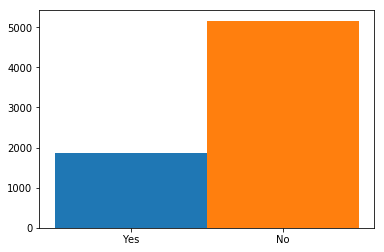

In [4]:
churn_yes = churn_data["Churn"].loc[churn_data["Churn"] == "Yes"]
churn_no = churn_data["Churn"].loc[churn_data["Churn"] == "No"]


plt.hist([churn_yes], bins='auto')
plt.hist([churn_no], bins='auto')

plt.show()

In [5]:
#Drop columns that don't have direct influence to user churn 
churn_data.drop("customerID",axis = 1,inplace = True)


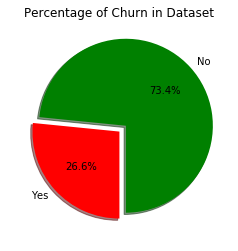

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           1       1             1   
1       0              0        1           1      34             0   
2       0              0        1           1       2             0   
3       0              0        1           1      45             1   
4       1              0        1           1       2             0   

   MultipleLines  InternetService  OnlineSecurity OnlineBackup  \
0              0                1               1          Yes   
1              1                1               0           No   
2              1                1               0          Yes   
3              0                1               0           No   
4              1                0               1           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
0               No          No          No              No         1   
1              Yes          No  

In [27]:
sizes = churn_data['Churn'].value_counts(sort = True)
colors = ["green","red"] 
#rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, colors=colors, explode= (0.1,0), labels = ["No", "Yes"],
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

print(churn_data.head(5))

In [28]:
#Convert all categorical data into numerical data
cat_columns = ["OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "PaymentMethod" ,"gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "Contract", "Churn"]

for column in cat_columns:
    churn_data[column] = pd.get_dummies(churn_data[column])



In [29]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'])

In [31]:
# Setting Y and X values for training set

y = churn_data["Churn"]
X = churn_data.drop(labels = ["Churn"],axis = 1)

X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.518629,0.656428,0.502702,0.438993,0.439989,0.493743,0.399460,0.395478,0.448948,0.407281,0.219283,64.798208,2283.300441
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.499688,0.474934,0.500028,0.496300,0.496421,0.499996,0.489822,0.488988,0.497422,0.491363,0.413790,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [43]:
churn_model = DecisionTreeRegressor(random_state=2)

# Fit model
churn_model.fit(X, y.astype(int))



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')